In [59]:
import sys
sys.path.append(r"C:\Users\W\Desktop\Assignments\Applied stochastic analysis\MarkovChain")

import numpy as np
import matplotlib.pyplot as plt
import importlib
import methods.calc
from methods.calc import mccalc
print(methods.calc)
importlib.reload(methods.calc)

# Applications of forward Kolmogorov equation and backward Kolmogorov equation for time homogeneous Markov Chain

transition_matrix = [[0.8, 0.2, 0, 0, 0],[0.6, 0, 0.4, 0, 0], [0, 0.5, 0, 0.5, 0], [0, 0, 0.5, 0, 0.5], [0, 0, 0, 1, 0]]
initial = 1
N = 60
num = 3

model = mccalc(transition_matrix)
prob = model.transition_prob(N,2,4)
print(f"The probability of transition from state 2 to state 4 is {prob}")

initial_probs = [0, 0, 1, 0, 0]
final_state = 2
prob = model.homo_forward_Kolmogorov_prob(N, initial_probs, 2)
print(f"The probability of transition to final state is {prob}, given the initial probability distributions")

initial_probs = [0, 0, 1, 0, 0]
final_state = 2
probs = model.homo_backward_Kolmogorov_prob(N, final_state, initial_probs)
print(f"The probability of staying in the final state after N steps is {prob}, given the initial probability distribution")


bool1 = model._if_irreducible()
print(f"Whether the transition matrix is irreducible: {bool1}")

station = model.compute_stationary_distribution()
print(f"The stationary distribution is given by {station}")

check_detailed_balance = model.examine_detailed_balance()
print(f"Whether the model is detailed balanced: {check_detailed_balance}")

<module 'methods.calc' from 'c:\\Users\\W\\Desktop\\Assignments\\Applied stochastic analysis\\MarkovChain\\methods\\calc.py'>
The probability of transition from state 2 to state 4 is 0.06752070196461911
The probability of transition to final state is 0.13448294491566656, given the initial probability distributions
The probability of staying in the final state after N steps is 0.13448294491566656, given the initial probability distribution
Whether the transition matrix is irreducible: True
The stationary distribution is given by [0.5        0.16666667 0.13333334 0.13333333 0.06666667]
Whether the model is detailed balanced: True


In [60]:
sol = model.spectral_decomposition()
print("V:\n", sol.V)
print("pi:\n", sol.pi)
print("D:\n", sol.D)
print("D^-1:\n", sol.D_inv)
print("The Eigenvalues of V:\n", sol.eigval_V)
print("The Eigenvectors of V:\n", sol.eigvec_V)
print("The Left Eigenvectors of P:\n", sol.left_eigvec_P)
print("The Right Eigenvectors of P:\n", sol.right_eigvec_P)

bool2 = model.check_stationary_with_eigenvector()
print(f"Whether the stationary distribution matches the eigenvector related to lambda = 1: {bool2}")

V:
 [[0.8        0.34641016 0.         0.         0.        ]
 [0.34641016 0.         0.44721359 0.         0.        ]
 [0.         0.4472136  0.         0.50000001 0.        ]
 [0.         0.         0.49999999 0.         0.70710676]
 [0.         0.         0.         0.7071068  0.        ]]
pi:
 [0.5        0.16666667 0.13333334 0.13333333 0.06666667]
D:
 [[0.70710678 0.         0.         0.         0.        ]
 [0.         0.40824829 0.         0.         0.        ]
 [0.         0.         0.36514838 0.         0.        ]
 [0.         0.         0.         0.36514837 0.        ]
 [0.         0.         0.         0.         0.25819889]]
D^-1:
 [[1.41421356 0.         0.         0.         0.        ]
 [0.         2.44948975 0.         0.         0.        ]
 [0.         0.         2.73861276 0.         0.        ]
 [0.         0.         0.         2.73861282 0.        ]
 [0.         0.         0.         0.         3.87298329]]
The Eigenvalues of V:
 [-0.91500206 -0.39435439  0

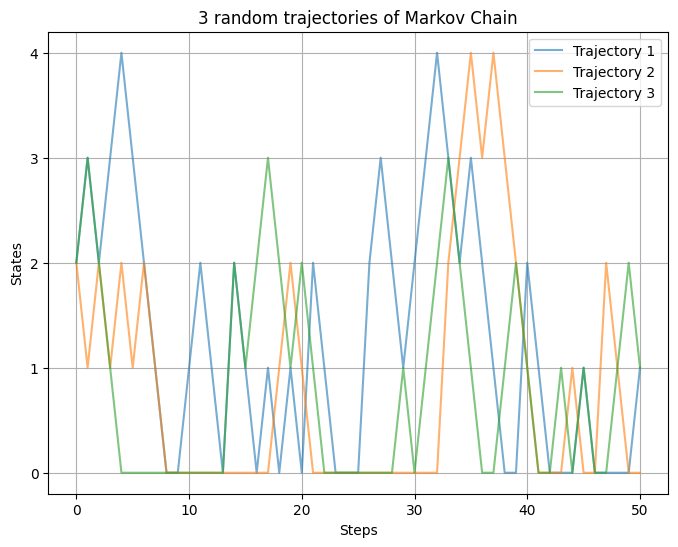

[array([2, 3, 2, 3, 4, 3, 2, 1, 0, 0, 1, 2, 1, 0, 2, 1, 0, 1, 0, 1, 0, 2,
       1, 0, 0, 0, 2, 3, 2, 1, 2, 3, 4, 3, 2, 3, 2, 1, 0, 0, 2, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1]), array([2, 1, 2, 1, 2, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 4, 3, 4, 3, 2, 1, 0, 0, 0,
       1, 0, 0, 2, 1, 0, 0]), array([2, 3, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 3, 2, 1, 2, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 3, 2, 1, 0, 0, 1, 2, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 2, 1])] [1.4196538718134243e-17, 1.6238139007706136e-13, 1.5906748415712139e-15]


In [48]:
from scipy.linalg import eig
from methods.mcplot import trplot
transition_matrix = [[0.7,0.2, 0.1, 0, 0],[0.7, 0, 0.3, 0, 0], [0, 0.7, 0, 0.3, 0], [0, 0, 0.7, 0, 0.3], [0, 0, 0, 1, 0]]
initial = 2
N = 50
num = 3

model = trplot(transition_matrix, initial=initial)
path, probs = model.n_step_max_likelyhood(N, num, plot_graph=False)


path, probs = model.n_step_random_trajectories(N, num, plot_graph=True)
print(path, probs)              